In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_excel('/content/flood dataset.xlsx')

In [6]:
data.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


<ipython-input-7-85f60c60e185>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(data['Temp']))


Axes(0.125,0.11;0.775x0.77)


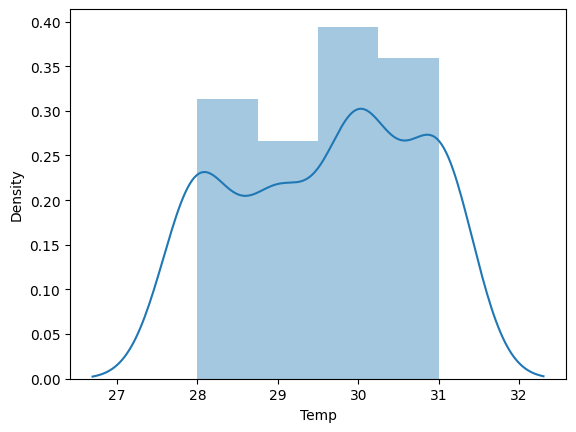

In [7]:
print(sns.distplot(data['Temp']))

In [ ]:
print(sns.boxplot(data['Temp']))

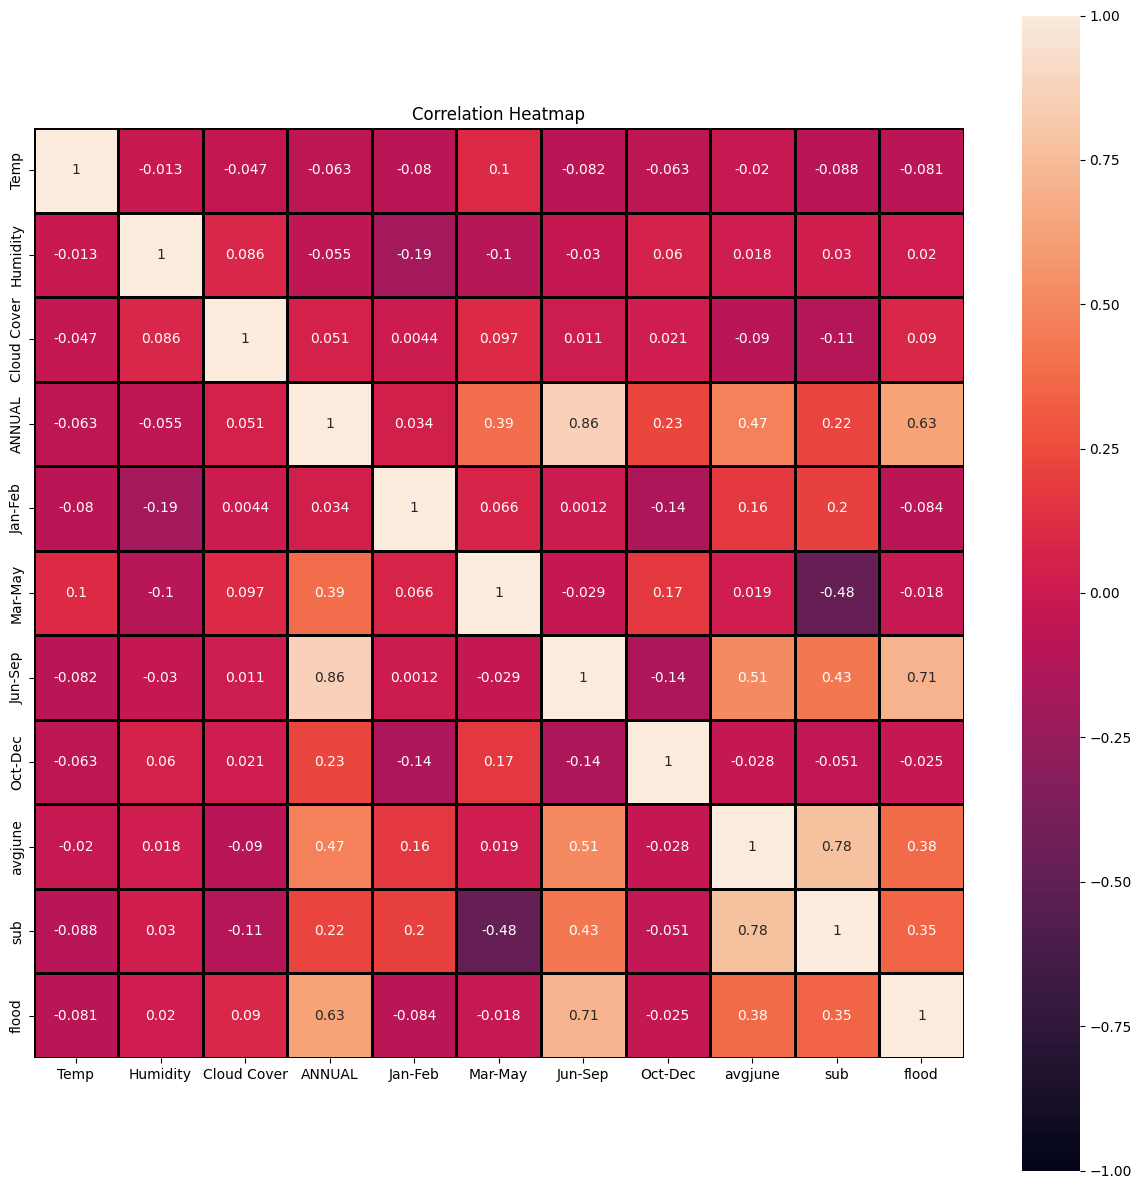

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))

# Use sns.heatmap to create the heatmap
heatmap = sns.heatmap(data.corr(), annot=True, linewidths=1, linecolor='k', square=True,
                      vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

# Setting title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

In [9]:
data.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


In [11]:
data.describe()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [12]:
data.isnull().sum()

Temp           0
Humidity       0
Cloud Cover    0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
avgjune        0
sub            0
flood          0
dtype: int64

In [31]:
X = data.drop('flood', axis=1)
y = data['flood']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [33]:
X_train.shape

(86, 10)

In [34]:
X_test.shape

(29, 10)

In [35]:
y_train.shape

(86,)

In [36]:
y_test.shape

(29,)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [38]:
from joblib import dump
dump(sc,"transform.save")

['transform.save']

In [63]:
from sklearn import metrics

In [64]:
from sklearn import tree

In [65]:
dtree=tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dtree.predict(X_test)

In [67]:
metrics.accuracy_score(y_test,y_pred)

0.9655172413793104

In [68]:
from sklearn import ensemble

In [69]:
RF=ensemble.RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
y_pred_rf = RF.predict(X_test)

In [71]:
metrics.accuracy_score(y_test,y_pred_rf)

1.0

In [49]:
from sklearn import neighbors

In [50]:
knn=neighbors.KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(X_test)

In [52]:
metrics.accuracy_score(y_test,y_pred)

0.896551724137931

In [53]:
import xgboost

In [54]:
xgb=xgboost.XGBClassifier()

In [56]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred = xgb.predict(X_test)

In [58]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [59]:
metrics.confusion_matrix(y_test,y_pred)

array([[26,  0],
       [ 0,  3]])

In [60]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [61]:
metrics.precision_score(y_test,y_pred)

1.0

In [72]:
metrics.recall_score(y_test,y_pred)

1.0

In [73]:
dump(xgb,"floods.save")

['floods.save']